In [68]:
# Imports
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score


# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [7]:
df = pd.read_csv('data/hw2data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [11]:
x = df.loc[:, df.columns != 'y']
y = df['y']

print("x head displayed below")
print(x.head())
print("y head displayed below")
print(y.head())

X head displayed below
          0         1         2         3         4         5         6  \
0  0.382732 -0.034242  1.096347 -0.234216 -0.347451 -0.581268 -1.632635   
1  0.555963  0.892474 -0.422315  0.104714  0.228053  0.201480  0.540774   
2  0.013240 -0.121945  0.339059 -0.589632 -0.895816  0.548328  0.098667   
3 -1.532921 -1.711970  0.046135 -0.958374 -0.080812 -0.703859 -0.770784   
4 -1.619685  0.572627  1.902618 -0.775664 -0.188090 -1.035748  1.177830   

          7         8         9    ...          490       491       492  \
0 -1.567768 -1.179158  1.301428    ...     0.441033  0.178793 -0.799422   
1 -1.818078 -0.049324  0.239034    ...    -0.998849 -0.740137 -0.565498   
2  0.197181  1.059027 -1.022564    ...     1.342622 -0.739936  1.315138   
3 -0.480845  0.703586  0.929145    ...     0.140811  0.473488  1.855246   
4 -2.305167 -2.263660  0.375020    ...    -0.340560 -1.303220  0.466751   

        493       494       495       496       497       498       499  
0

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

In [42]:
# split into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Initialize alpha range
alphas = np.logspace(-8,-3,1000)

# Do Lasso regression
our_lasso = Lasso()

train_errors = list()
test_errors = list()
# Iterate through alphas and append errors to a list
for alpha in alphas:
    our_lasso = Lasso(alpha=alpha)
    our_lasso.fit(x_train, y_train)
    train_errors.append(our_lasso.score(x_train, y_train))
    test_errors.append(our_lasso.score(x_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
our_lasso.set_params(alpha=alpha_optim)
coef = enet.fit(x, y).coef_

/Users/MichaelQu/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal regularization parameter : 0.000568531791387


d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

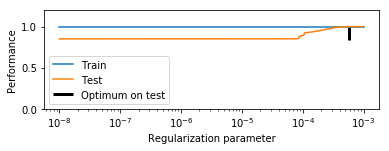

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in 
# Note that these coefficients were found in the cell above
# alphas = []
# train_errors = []
# test_errors = []
# alpha_optim = 0

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

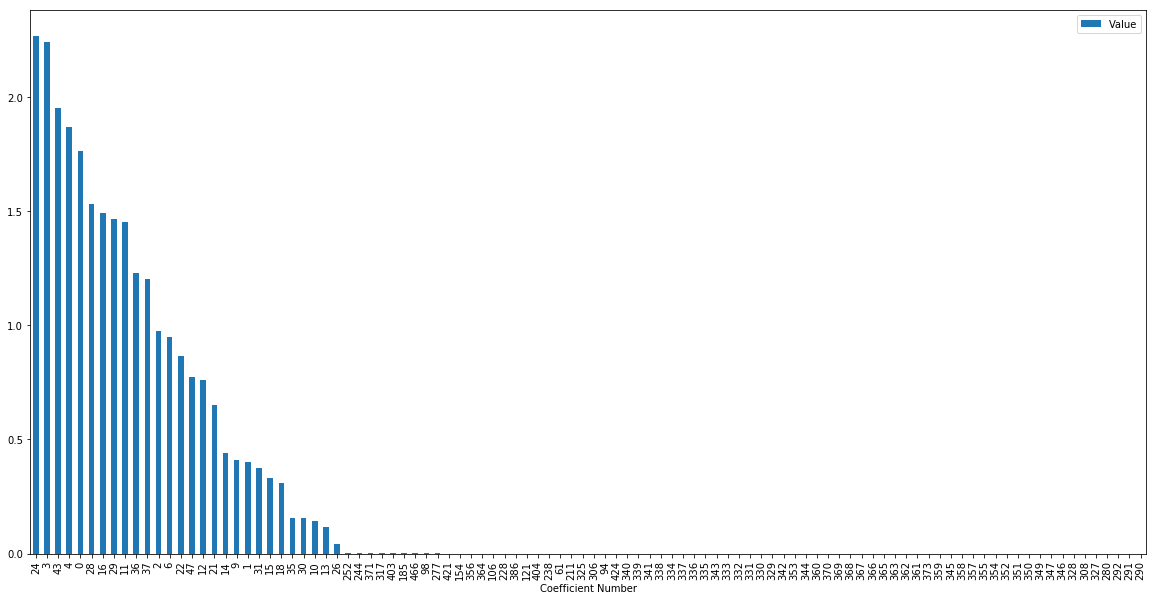

In [67]:
# Convert our regression to pandas dataframe
coeff = pd.DataFrame({'Coefficient Number': range(len(our_lasso.coef_)), 'Value': our_lasso.coef_})

# Sort the data and then find the top 100 coefficients
top_sorted = coeff.sort_values('Value', ascending=False)[:100]

# Plot the top 100 coefficients
top_sorted.plot(x='Coefficient Number', y='Value', kind='bar', figsize=(20,10))

### Answer e)

A lot of the coefficients are zero because we are using lasso regression. Lasso regression means that the level sets for the constraint are all boxes. The max value of our objective function subject to our constraint happens when the tangent of the two are the same. However, the tangent to a corner of the box has multiple values whereas for a circle, all points on the circle only have 1 tangent line. This means that when we maximize our objective function value, our max will tend towards the axis for lasso regression. In a two-dimensional example, if we were to end up on the axis of $\beta_1$, we would expect $\beta_2$ to be zero. For 500 dimensions, as we tend towards a corner, a lot of coefficients will tend towards zero.

See below for an example of level sets of a lasso regression.

<img src="pics/lasso_ridge.png">

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

/Users/MichaelQu/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/MichaelQu/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/MichaelQu/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/MichaelQu/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

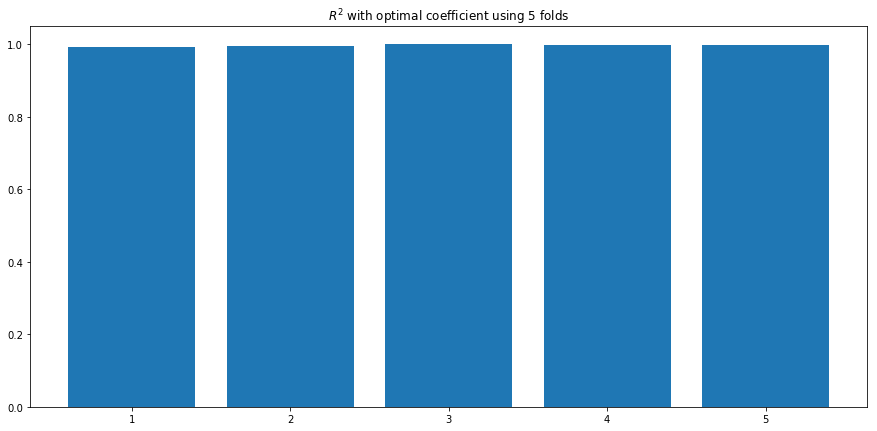

In [83]:
# Find the score list using cross_val_score
score_list = cross_val_score(our_lasso, x, y, cv=5)
plt.figure(figsize=(15,7))
plt.bar(range(1,len(score_list) + 1),score_list)
plt.title('$R^2$ with optimal coefficient using 5 folds')



### Answer e)

As we can see from above, even using random subsets, we still get really good $R^2$ values. All of them are close to 1.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [95]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(x,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        x_train, x_test = x[train_index], x[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
        coeffs.append(clf.coef_)
    return coeffs


scaler = preprocessing.StandardScaler()
x_scaled = x.as_matrix().astype(np.float)
x_scaled = scaler.fit_transform(x)

coeffs=run_cv_coeffs(x_scaled,np.array(y),Lasso,alpha=alpha_optim)

/Users/MichaelQu/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [96]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(x.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(x.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

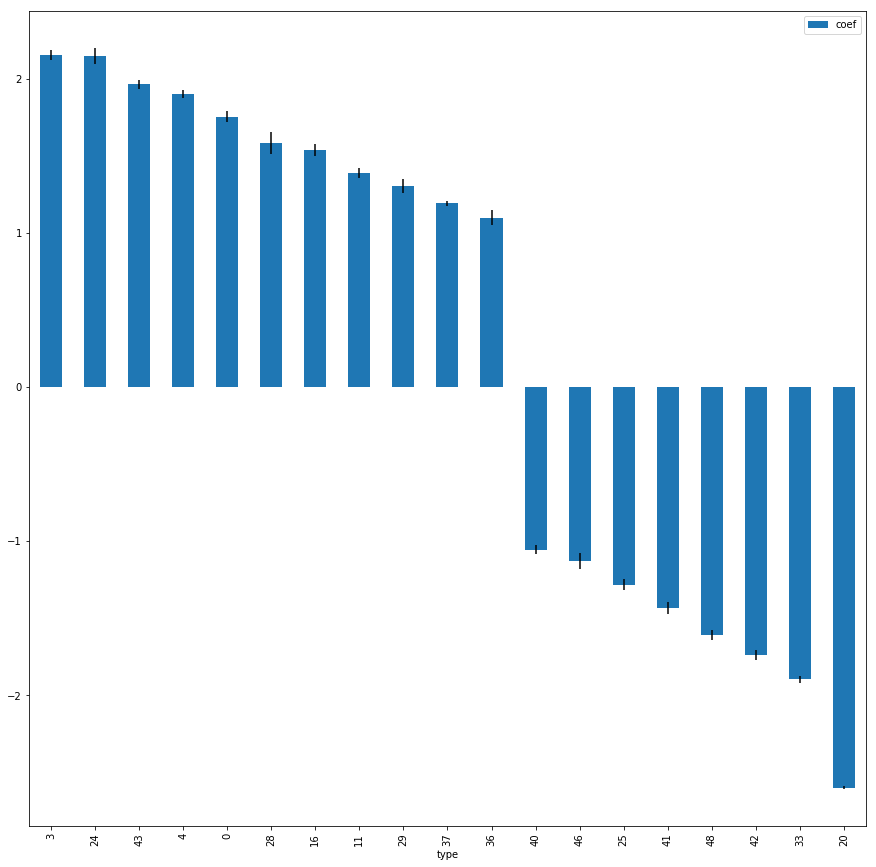

In [97]:
dfCoeffs = pd.DataFrame({'type':x.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))